In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Housing Survey (Responses).xlsx')
df.head(5)

,Timestamp,Location of the house,What is the rent paid,Number of bedrooms,which floor do you live on,whats your household/family size
0,2020-12-08 09:17:45.583,Kiambu area,12000,2,0.0,2.0
1,2020-12-08 09:20:45.177,Other,10000000,10,10.0,5.0
2,2020-12-08 09:21:03.627,Nairobi,NaN,0,0.0,1.0
3,2020-12-08 09:21:38.102,Nairobi,002,five bedrooms,0.0,1.0
4,2020-12-08 09:22:16.922,Other,five thousands,0,7.0,1.0


In [4]:
df.shape

(70, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Timestamp                         70 non-null     datetime64[ns]
 1   Location of the house             58 non-null     object        
 2   What is the rent paid             31 non-null     object        
 3   Number of bedrooms                50 non-null     object        
 4   which floor do you live on        52 non-null     float64       
 5   whats your household/family size  55 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.4+ KB


In [6]:
df.isnull().sum()

Timestamp                            0
Location of the house               12
What is the rent paid               39
Number of bedrooms                  20
which floor do you live on          18
whats your household/family size    15
dtype: int64

In [7]:
df.rename(columns = {'Location of the house':'Location_of_the_house', 'What is the rent paid':'What_is_the_rent_paid','Number of bedrooms':'Number_of_bedrooms','which floor do you live on':'which_floor_do_you_live_on','whats your household/family size':'family_size'}, inplace = True) 
   

In [8]:
df.head(2)

,Timestamp,Location_of_the_house,What_is_the_rent_paid,Number_of_bedrooms,which_floor_do_you_live_on,family_size
0,2020-12-08 09:17:45.583,Kiambu area,12000,2,0.0,2.0
1,2020-12-08 09:20:45.177,Other,10000000,10,10.0,5.0


In [9]:
df.Location_of_the_house.value_counts()

Kiambu area    22
Nairobi        19
Other          17
Name: Location_of_the_house, dtype: int64

In [10]:
df['Location_of_the_house']=df['Location_of_the_house'].fillna(value='Nairobi')

In [11]:
empty=[]
for i in df['Number_of_bedrooms']:
    if i=='five bedrooms':
        empty.append(5)
    else:
        empty.append(i)
df['Number_of_bedrooms']=empty
df.head()

,Timestamp,Location_of_the_house,What_is_the_rent_paid,Number_of_bedrooms,which_floor_do_you_live_on,family_size
0,2020-12-08 09:17:45.583,Kiambu area,12000,2.0,0.0,2.0
1,2020-12-08 09:20:45.177,Other,10000000,10.0,10.0,5.0
2,2020-12-08 09:21:03.627,Nairobi,NaN,0.0,0.0,1.0
3,2020-12-08 09:21:38.102,Nairobi,002,5.0,0.0,1.0
4,2020-12-08 09:22:16.922,Other,five thousands,0.0,7.0,1.0


In [12]:
df['What_is_the_rent_paid']=df['What_is_the_rent_paid'].fillna(0)

In [13]:
clean_rent=[]
for i in df['What_is_the_rent_paid']:
    if i=='five thousands':
        clean_rent.append(5000)
    elif int(i)>500000:
        clean_rent.append(0)
    else:
        clean_rent.append(int(i))
df['What_is_the_rent_paid']=clean_rent
df.head(2)

,Timestamp,Location_of_the_house,What_is_the_rent_paid,Number_of_bedrooms,which_floor_do_you_live_on,family_size
0,2020-12-08 09:17:45.583,Kiambu area,12000,2.0,0.0,2.0
1,2020-12-08 09:20:45.177,Other,0,10.0,10.0,5.0


In [14]:
df['Number_of_bedrooms']=df['Number_of_bedrooms'].fillna(value=df['Number_of_bedrooms'].mean())
df['which_floor_do_you_live_on']=df['which_floor_do_you_live_on'].fillna(value=df['which_floor_do_you_live_on'].median())
df['family_size']=df['family_size'].fillna(value=df['family_size'].mean())
df.head(2)

,Timestamp,Location_of_the_house,What_is_the_rent_paid,Number_of_bedrooms,which_floor_do_you_live_on,family_size
0,2020-12-08 09:17:45.583,Kiambu area,12000,2.0,0.0,2.0
1,2020-12-08 09:20:45.177,Other,0,10.0,10.0,5.0


In [15]:
df.columns

Index(['Timestamp', 'Location_of_the_house', 'What_is_the_rent_paid',
       'Number_of_bedrooms', 'which_floor_do_you_live_on', 'family_size'],
      dtype='object')

In [16]:
df=df.drop(['Timestamp'],axis = 1)
df.head(6)

,Location_of_the_house,What_is_the_rent_paid,Number_of_bedrooms,which_floor_do_you_live_on,family_size
0,Kiambu area,12000,2.0,0.0,2.000000
1,Other,0,10.0,10.0,5.000000
2,Nairobi,0,0.0,0.0,1.000000
3,Nairobi,2,5.0,0.0,1.000000
4,Other,5000,0.0,7.0,1.000000
5,Nairobi,0,4.5,3.0,3.472727


In [17]:
df['Location_of_the_house']=df.Location_of_the_house.map({'Kiambu area':0,'Other':1,'Nairobi':2,})

In [18]:
df.head()

,Location_of_the_house,What_is_the_rent_paid,Number_of_bedrooms,which_floor_do_you_live_on,family_size
0,0,12000,2.0,0.0,2.0
1,1,0,10.0,10.0,5.0
2,2,0,0.0,0.0,1.0
3,2,2,5.0,0.0,1.0
4,1,5000,0.0,7.0,1.0


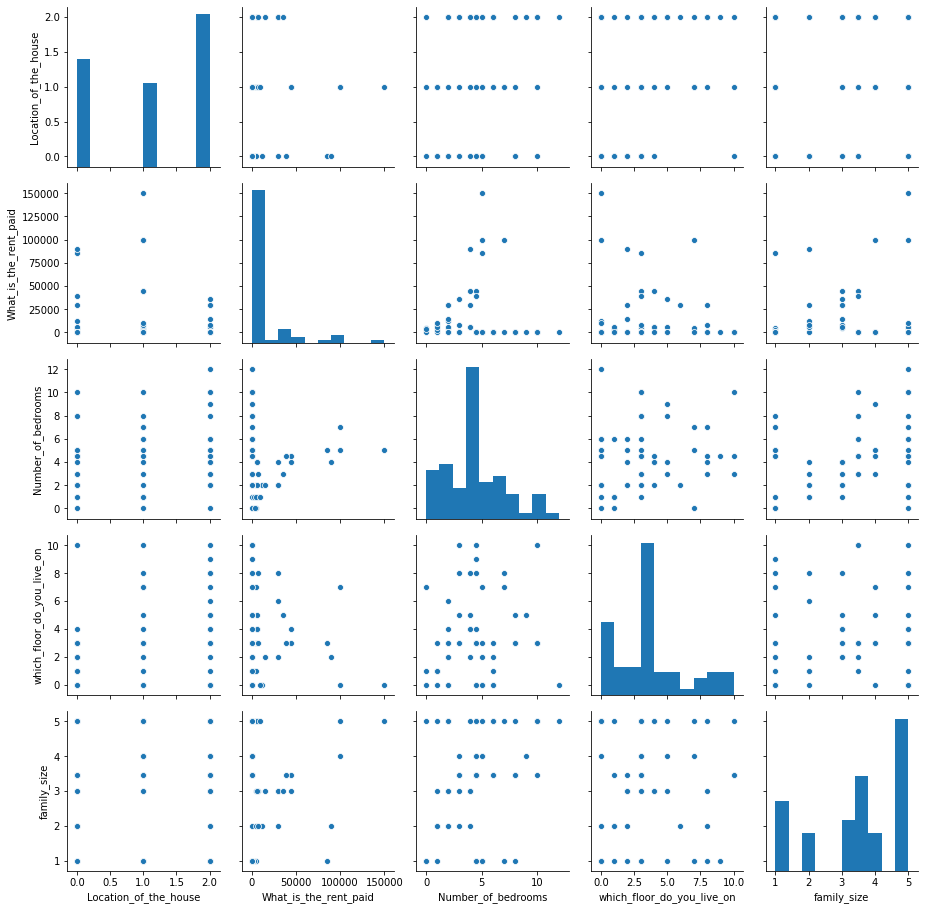

In [19]:
import seaborn as sns
sns.pairplot(df)

In [20]:
x = df[['Location_of_the_house','Number_of_bedrooms','which_floor_do_you_live_on','family_size']]
y = df[['What_is_the_rent_paid']]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state =10,test_size = 0.1)
print(x_train.shape,x_test.shape)

(63, 4) (7, 4)


In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,y_test)

13255.725132794465

In [32]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=10000)
model.fit(x_train,y_train)
pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,y_test)

/home/kennedy/yes/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


14677.241391156464

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators= 20000)
model.fit(x_train,y_train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,y_test)

/home/kennedy/yes/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14677.241391156464

In [30]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(x_train,y_train)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,y_test)

/home/kennedy/yes/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


13255.725132794465